Note that the variables in the houshold problem e, a, are in terms of non-tradable goods. We can convert them to tradable goods by multiplying them by the price of the non-tradable good. Consumption outputs c are in real terms.

In [2]:
%load_ext autoreload
%autoreload 2


import numpy as np
import sys

import matplotlib.pyplot as plt  
import seaborn as sns
import figures as figs
import calculations
from types import SimpleNamespace
import pandas as pd

# Ploting jacobians wrt ptilde
from matplotlib.ticker import FormatStrFormatter

from seaborn import set_palette
from matplotlib import rc
plt.style.use('seaborn-v0_8-white')
set_palette("colorblind")
rc('font',**{'family':'serif','serif': ['Palatino']})
rc('text',usetex=True)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

# Should make insure text size in latex mode
# plt.rcParams.update({
#     "text.latex.preamble": r"\usepackage{palatino} \normalsize"
# })

from IHANKModel import IHANKModelClass



In [3]:
# options
model = IHANKModelClass(name='baseline')
set_options = True
if set_options:


    run_test = False
    save_figs = False

    # Options for figures
    path = '/Users/emmagundersen/Desktop/Current code/I_HANK_PIGL1703/fig/1903/'
    lvl_path = ['U_hh', 'Walras', 'CB', 'i', 'NX', 'CA', 'ra', 'iF_s',  'iF_s']
    path_philips= ['WTH', 'WNT', 'NTH', 'NNT', 'PTH', 'PNT', 'PF', 'UC_TH_hh', 'UC_NT_hh', 'EX']
    paths = ['PE_s', 'PE', 'YH',  'W', 'P', 'w', 'tau',  'N', 'INC', 'inc',  'CT', 'CNT', 'p', 'E', 'PF_s', 'PF', 'CTH_s', 'i', 'ra', 'iF_s']
    target_var = ['PE_s', 'PE', 'p', 'inc_NT', 'inc_TH', 'ra', 'i', 'Q']
    paths_2 = ['PE', 'PT', 'PNT', 'p', 'CT', 'CNT', 'YH', 'P', 'W', 'w', 'PF']
    paths_extended = ['E', 'NTH', 'NNT', 'YTH', 'YNT', 'WTH', 'WNT', 'PTH', 'PNT', 'PF', 'PTH_s', 'PT', 'P', 'PE', 'PTHF', 'PE_s', 'E', 'Q', 'DomP', 'i', 'r_real', 'G', 'B', 'tau', 'div_TH', 'div_NT', 'inc_TH', 'inc_NT', 'ra', 'p', 'n_NT', 'n_TH', 'A_hh', 'C_hh', 'UC_TH_hh', 'UC_NT_hh', 'E_hh', 'CNT_hh', 'CT_hh', 'U_hh', 'CT', 'CNT', 'CTF', 'CTH', 'CTH_s', 'A', 'EX', 'CTHF', 'CE', 'YH', 'W', 'w', 'N', 'INC', 'inc']
    paths_ = ['YH', 'CT', 'CNT', 'W', 'P', 'w', 'r_real',  'Q',  'inc', 'INC']

    # Options for shock 

    # shock_PE_i, shock_PE_s, shock_forigne_interest, shock_PF_s, shock_PF_s_taylor, shock_PE_PF, shock_PE_PF_taylor, shock_i = calculations.difine_shocks(model, scale=0.05, rho = 0.8) 
    shock_PE_s = calculations.difine_shocks(model, scale=0.05, rho = 0.8)[0]
    shock_i = calculations.difine_shocks(model, scale=0.05, rho = 0.8)[1]
    # Options for tables
    pd.set_option('display.max_rows', None)  # Show all rows
    pd.set_option('display.max_columns', None)  # Show all columns
    pd.set_option('display.width', 1000)  # Increase width to avoid line breaks
    pd.set_option('display.colheader_justify', 'center')  # Center column headers

    # Options for comparing models
    ddd = SimpleNamespace()
    ddd.T_max = 50
    ddd.ncols = 3
    ddd.varnames = paths_extended
    ddd.lvl_value = lvl_path
    ddd.do_shocks = False
    ddd.do_targets = False
    ddd.filename = None





    # Parameters to look at 
    # model.par.eta_s = 0.51
    # model.par.etaF = 0.51
    # model.par.nu = 0.7
    # model.par.etaE = 0.01
    # model.par.mon_policy = 'taylor'
    # model.par.phi = 1.5
    # model.par.kappa = 2.0
    # model.par.gamma = 0.4
    # model.par.nu = 0.3


In [6]:
model_ces = IHANKModelClass(name='CES non-homothetic')
# model_ces.par.phi = 1.2
model_ces.par.gamma = model_ces.par.epsilon 
model_ces.find_ss()
model_ces.compute_jacs()
model_ces.find_transition_path(shocks=shock_PE_s, do_end_check=False)

In [5]:
model_base.par.eta_T_RA

0.8200000000000001

In [7]:
model_base = IHANKModelClass(name='Baseline')
# model_base.par.phi = 1.2
model_base.find_ss()
model_base.compute_jacs()
model_base.find_transition_path(shocks=shock_PE_s, do_end_check=False)

In [8]:
model_CD = IHANKModelClass(name='Cobb Douglas')
model_CD.par.epsilon = 0.0
model_CD.par.gamma = 0.0
model_CD.find_ss()
model_CD.compute_jacs()
model_CD.find_transition_path(shocks=shock_PE_s, do_end_check=False)


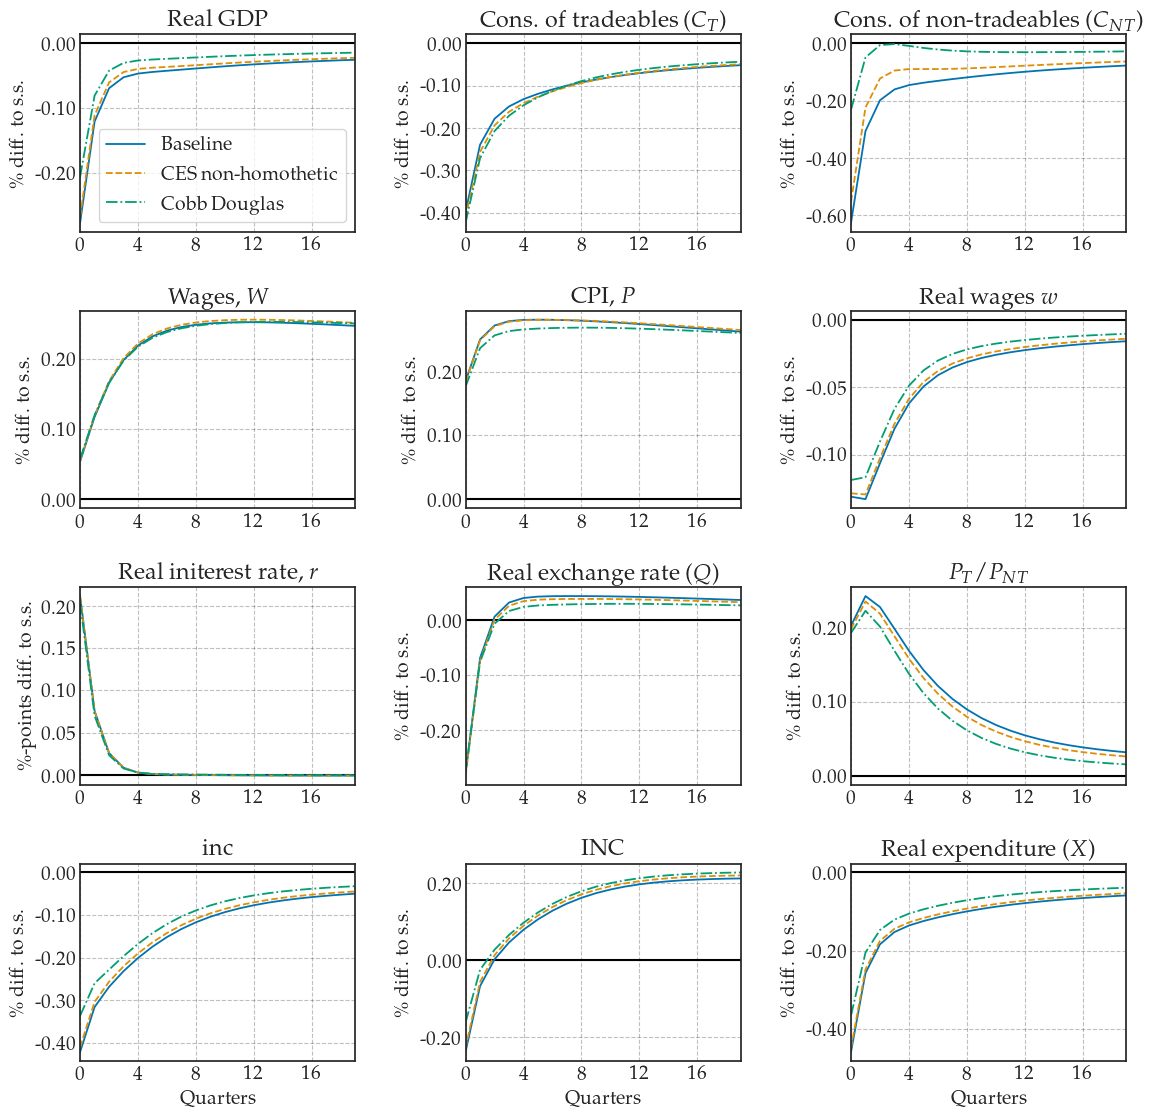

In [9]:
fig = figs.show_IRFs([model_base, model_ces, model_CD])

In [5]:
model_homo = IHANKModelClass('Homothetic')
model_homo.par.epsilon = 0.0
model_homo.par.gamma = 0.18
model_homo.find_ss()
model_homo.compute_jacs()
model_homo.find_transition_path(shocks=shock_PE_s, do_end_check=False)

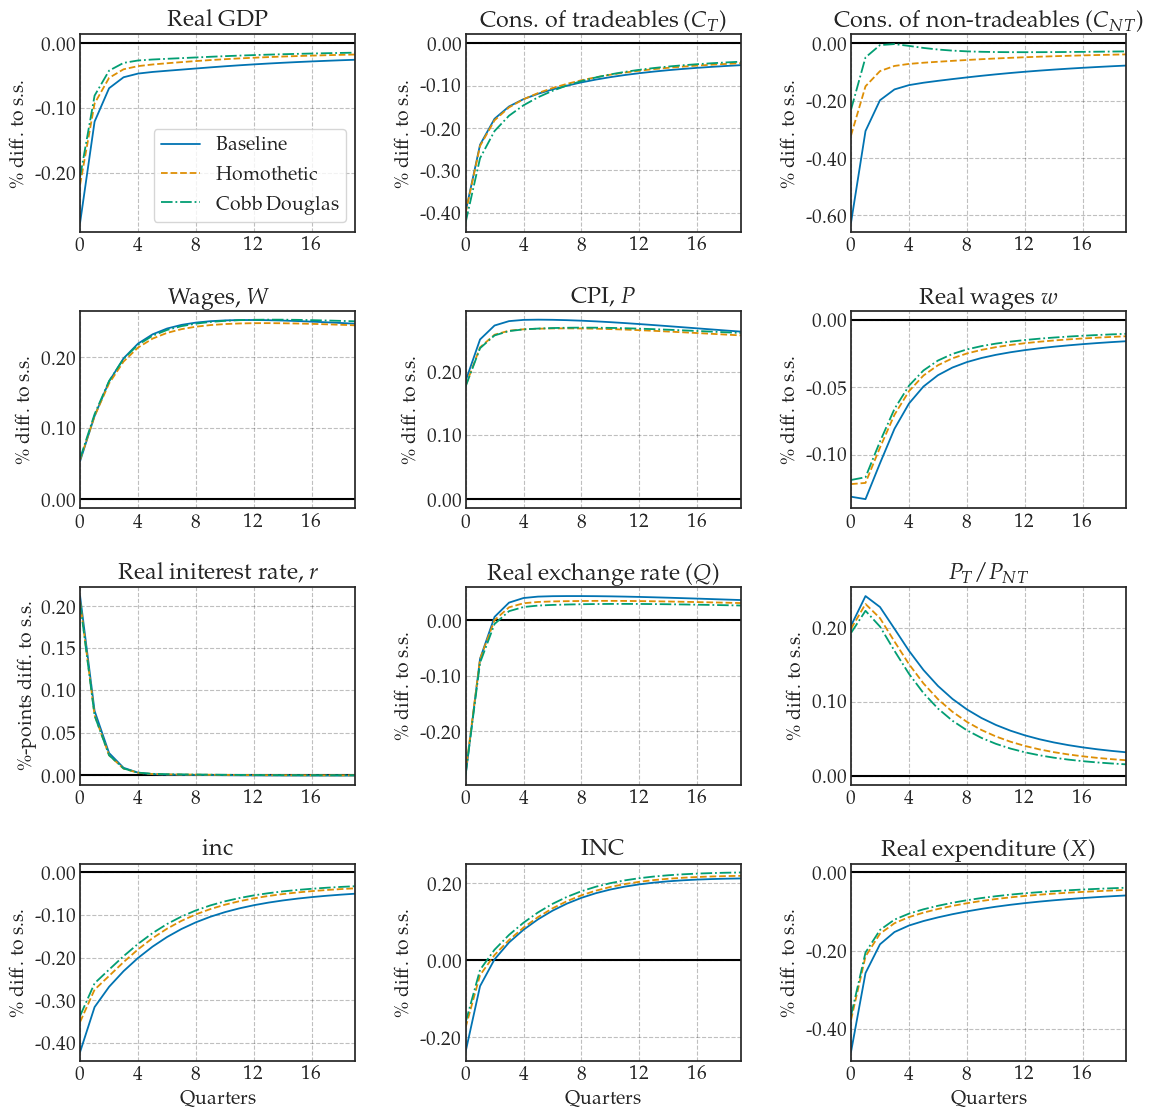

In [6]:
fig = figs.show_IRFs([model_base, model_homo, model_CD])

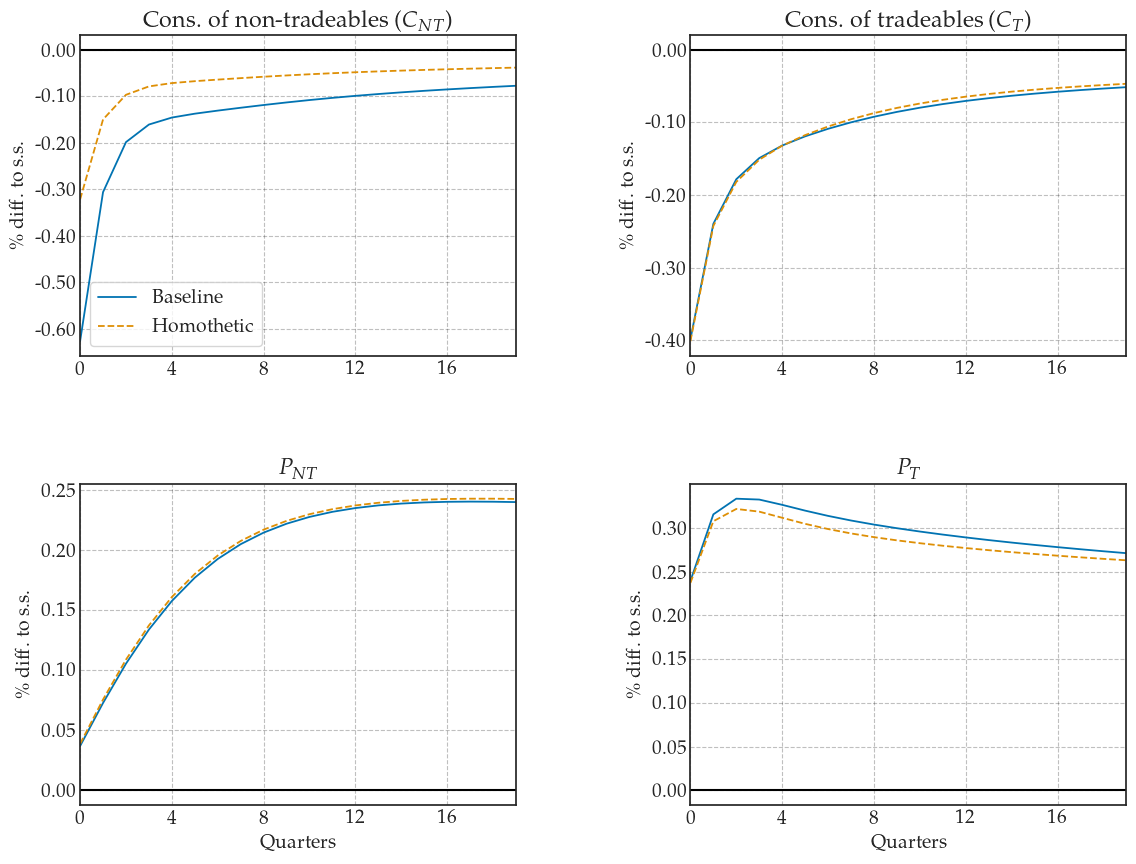

In [27]:
fig = figs.show_IRFs([model_base, model_homo], ['CNT', 'CT', 'PNT', 'PT'], maxcol=2)

In [8]:
model_homo = IHANKModelClass('Homothetic')
model_homo.par.epsilon = 0.0
model_homo.par.gamma = 0.18
model_homo.find_ss()
model_homo.compute_jacs()
model_homo.find_transition_path(shocks=shock_PE_s, do_end_check=False)

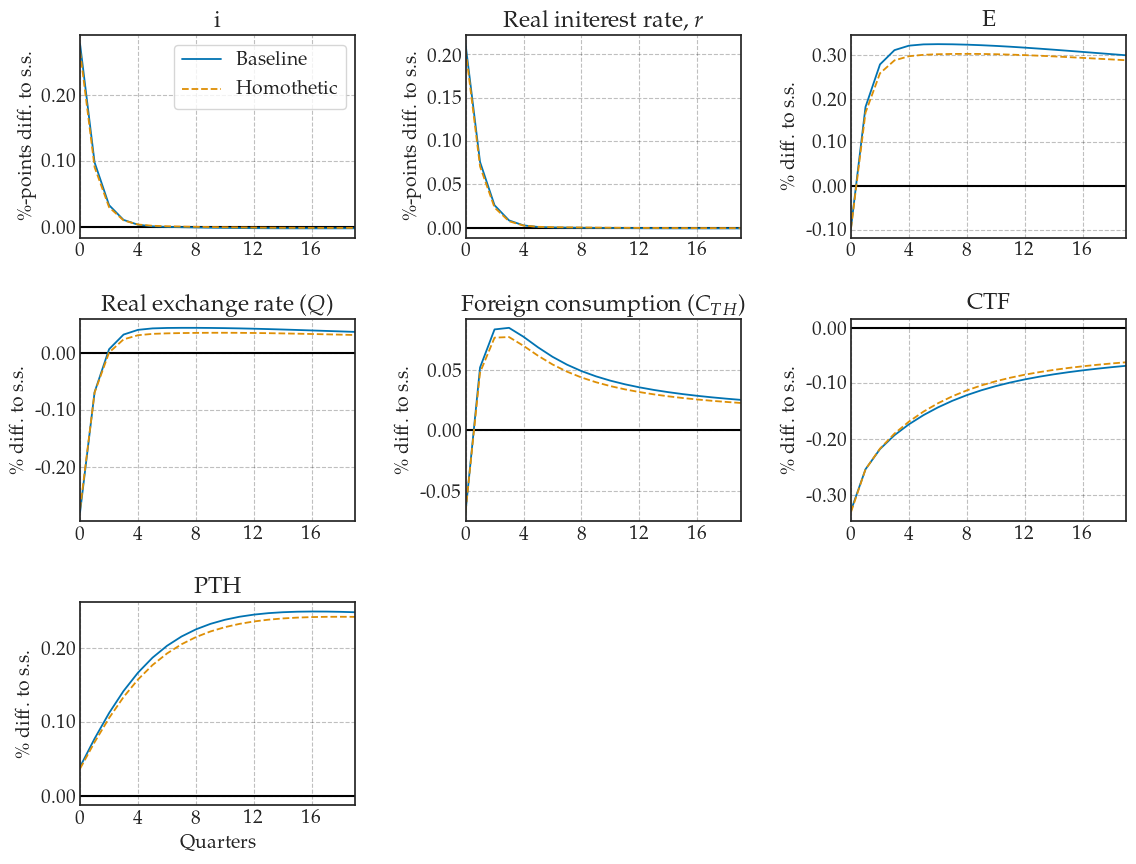

In [19]:
var_forign = ['i', 'r_real', 'E', 'Q', 'CTH_s', 'CTF', 'PTH']
fig = figs.show_IRFs([model_base,model_homo], var_forign)
# fig.savefig('plots/IRF_forign.png', dpi=300, bbox_inches='tight')

In [14]:
model.par.nu

0.7

In [15]:
model_high_nu = IHANKModelClass()
model_high_nu.par.nu = 0.8 
model_high_nu.find_ss()
model_high_nu.compute_jacs()
model_high_nu.find_transition_path(shocks= shock_PE_s, do_end_check=False)

In [17]:
model_ces = IHANKModelClass(name = 'CES')
model_ces.par.gamma = model_ces.par.epsilon
model_ces.find_ss()
model_ces.compute_jacs()
model_ces.find_transition_path(shocks= shock_PE_s, do_end_check=False)

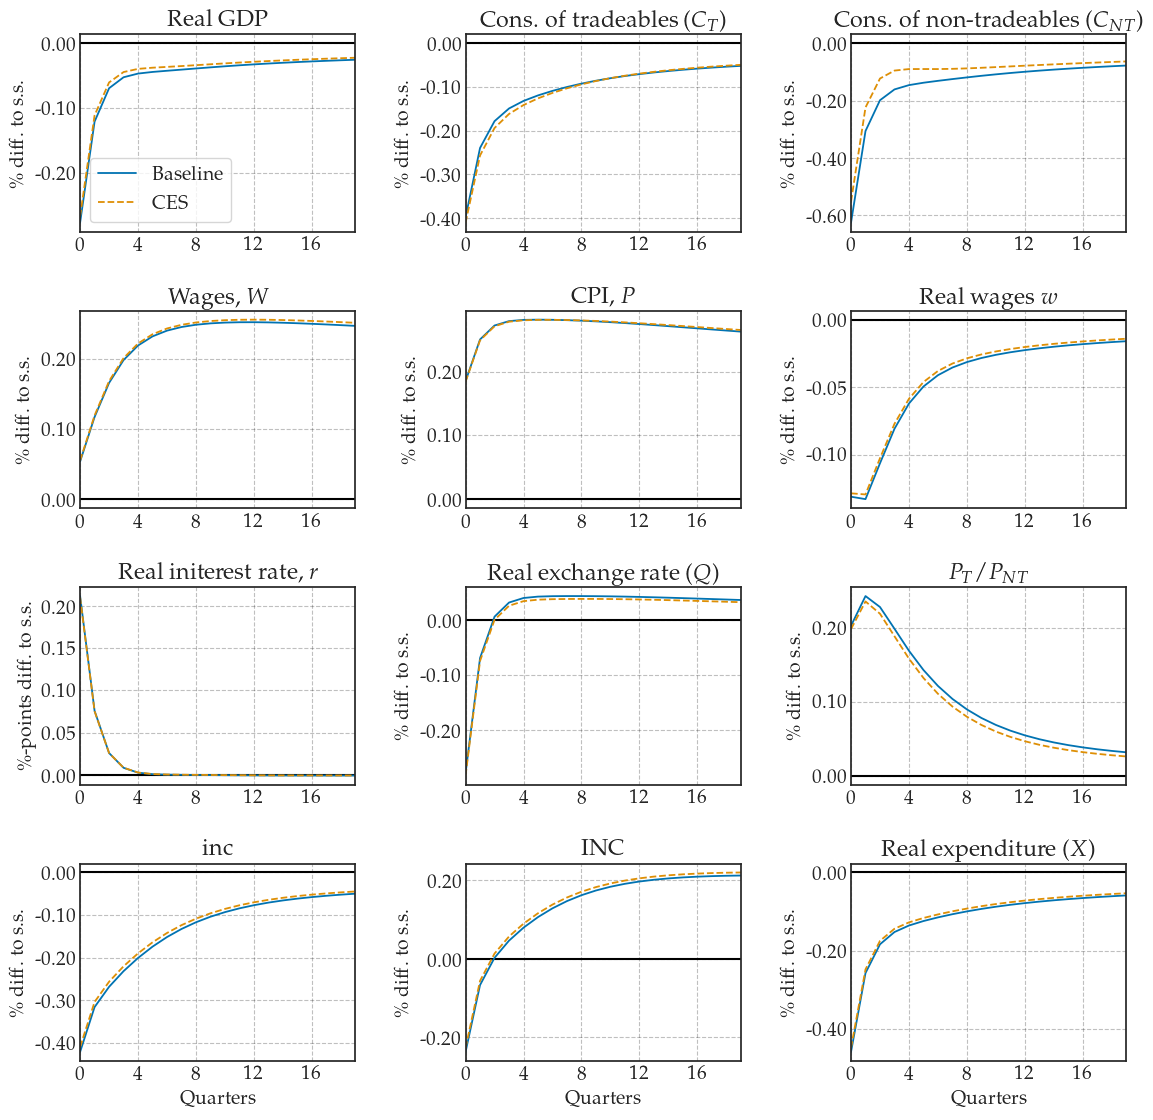

In [18]:
fig = figs.show_IRFs([model_base, model_ces])

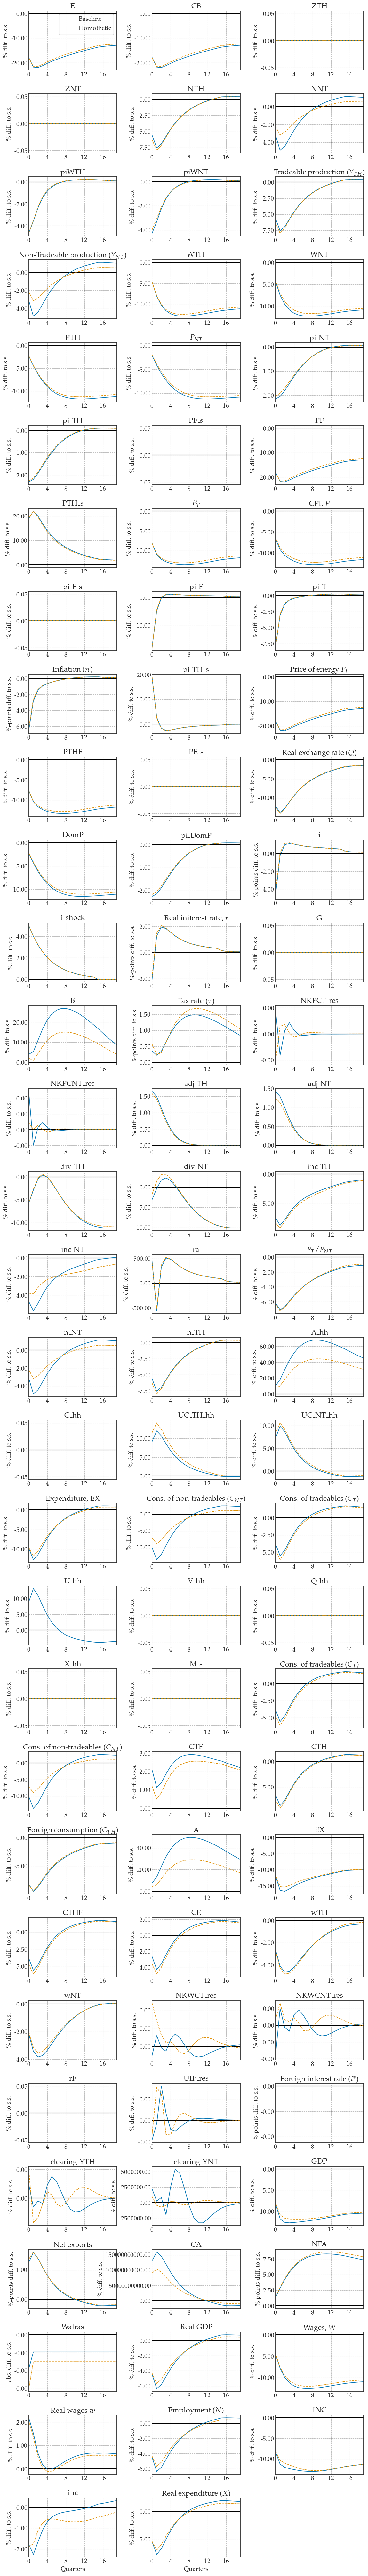

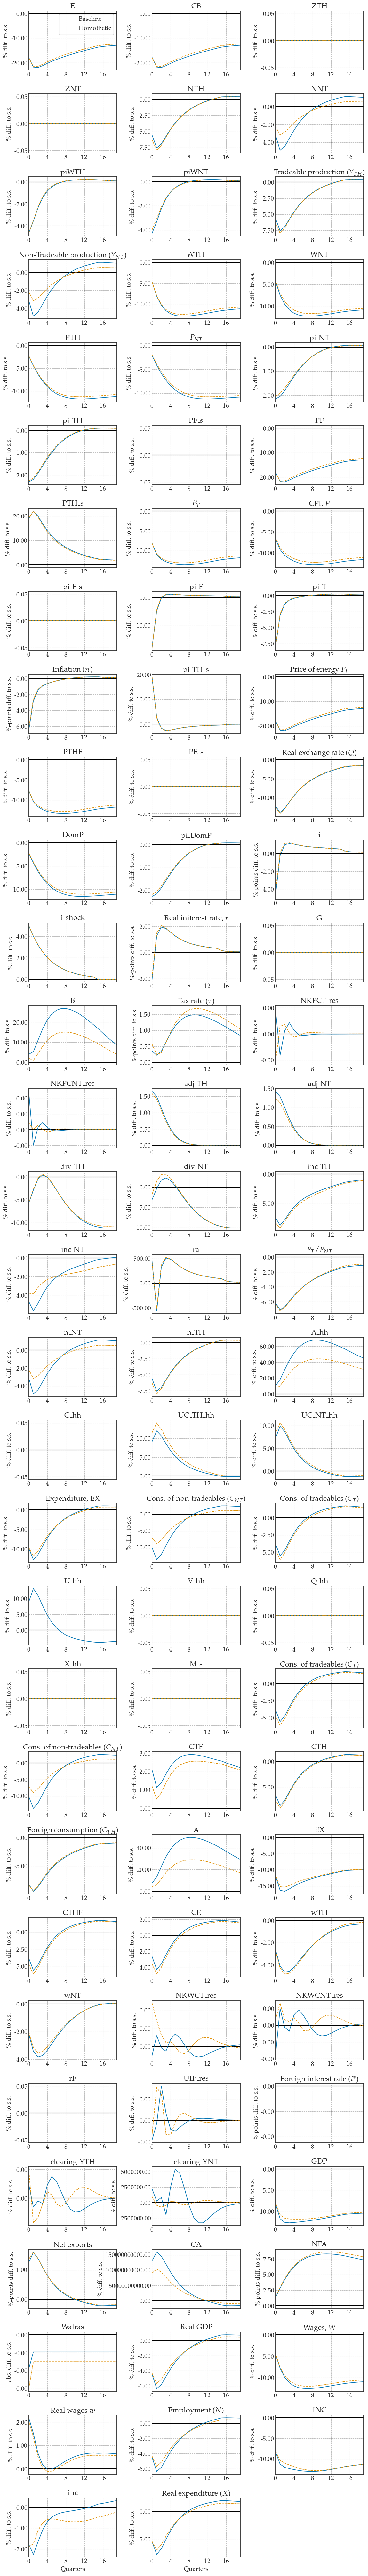

In [6]:
figs.show_IRFs([model_base,model_homo], model.varlist)

In [ ]:
model_base.par.mon_policy 

In [ ]:
model_base.par.phi

In [4]:
model_tight = IHANKModelClass(name='Tight Monetary Policy')
model_tight.par.phi = 1.8
# model_tight.find_ss()
# model_tight.compute_jacs()
# model_tight.find_transition_path(shocks=shock_PE_s, do_end_check=False)


In [ ]:
model_lose = IHANKModelClass(name='Loose Monetary Policy')
model_lose.par.phi = 1.2
model_lose.find_ss()
model_lose.compute_jacs()
model_lose.find_transition_path(shocks=shock_PE_s, do_end_check=False)


In [ ]:
figs.show_IRFs([model_lose, model_base, model_tight])

In [6]:

# def IRF_cohort(model, model_alt, shock, states=None, T_max=16):

import gc  # For garbage collection
import itertools
states = {
    'low': [0, 0, 0],   # original values
    'high': [0, 6, 300]
}
shock = shock_PE_s
# model = model_base
model_alt = model_tight

# Precompute SS and JAC once for each base model
model_base = model.copy(name='Baseline')
model_base.find_ss()
model_base.compute_jacs()

model_base_alt = model_alt.copy(name=model_alt.name)
model_base_alt.find_ss()
model_base_alt.compute_jacs()

# Initialize result dictionaries
CT_diff, CNT_diff, E_hh_diff, Q_diff, X_diff = {}, {}, {}, {}, {}
CT_diff_alt, CNT_diff_alt, E_hh_diff_alt, Q_diff_alt, X_diff_alt = {}, {}, {}, {}, {}

for state in states:
    # === Build normalized Dbeg_choice using both 0 and 1 in the first dimension
    s0, s1, s2 = states[state]
    Dbeg_choice = np.zeros(model.ini.Dbeg.shape)
    for i in [0, 1]:
        Dbeg_choice[i, s1, s2] = 1.0
    Dbeg_choice /= Dbeg_choice.sum()

    # === Standard model
    model_ns = model_base.copy(name='NoShock')
    model_ns.find_transition_path(shocks=[])
    model_ns.simulate_hh_path(Dbeg=Dbeg_choice)
    model_ns.calc_additional_new()

    model_s = model_base.copy(name='Shock')
    model_s.find_transition_path(shocks=shock, do_end_check=False)
    model_s.simulate_hh_path(Dbeg=Dbeg_choice)
    model_s.calc_additional_new()

    CT_diff[state] = (model_s.path.CT_hh - model_ns.path.CT_hh) / model_ns.path.CT_hh * 100
    CNT_diff[state] = (model_s.path.CNT_hh - model_ns.path.CNT_hh) / model_ns.path.CNT_hh * 100
    E_hh_diff[state] = (model_s.path.E_hh - model_ns.path.E_hh) / model_ns.path.E_hh * 100
    Q_diff[state] = (model_s.path.Q_hh - model_ns.path.Q_hh) / model_ns.path.Q_hh * 100
    X_diff[state] = (model_s.path.X_hh - model_ns.path.X_hh) / model_ns.path.X_hh * 100

    del model_ns, model_s
    gc.collect()

    # === alt model
    model_ns_alt = model_base_alt.copy(name='NoShock alt')
    model_ns_alt.find_transition_path(shocks=[])
    model_ns_alt.simulate_hh_path(Dbeg=Dbeg_choice)
    model_ns_alt.calc_additional_new()

    model_s_alt = model_base_alt.copy(name='Shock alt')
    model_s_alt.find_transition_path(shocks=shock, do_end_check=False)
    model_s_alt.simulate_hh_path(Dbeg=Dbeg_choice)
    gc.collect()
    model_s_alt.calc_additional_new()

    CT_diff_alt[state] = (model_s_alt.path.CT_hh - model_ns_alt.path.CT_hh) / model_ns_alt.path.CT_hh * 100
    CNT_diff_alt[state] = (model_s_alt.path.CNT_hh - model_ns_alt.path.CNT_hh) / model_ns_alt.path.CNT_hh * 100
    E_hh_diff_alt[state] = (model_s_alt.path.E_hh - model_ns_alt.path.E_hh) / model_ns_alt.path.E_hh * 100
    Q_diff_alt[state] = (model_s_alt.path.Q_hh - model_ns_alt.path.Q_hh) / model_ns_alt.path.Q_hh * 100
    X_diff_alt[state] = (model_s_alt.path.X_hh - model_ns_alt.path.X_hh) / model_ns_alt.path.X_hh * 100

    del model_ns_alt, model_s_alt

3.5021330869857508
3.5021330869857508
3.5021330869857508
3.5021330869857508
3.5021330869857508
3.5021330869857508
3.5021330869857508
3.5021330869857508


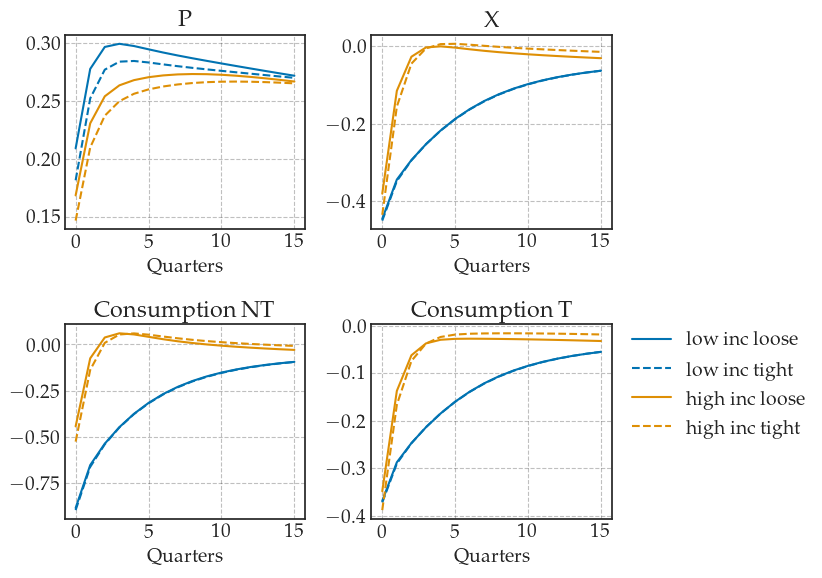

In [7]:
T_max = 16
    # === Plotting

fig = plt.figure(figsize=(10, 6))
ncols, nrows = 2, 2

# Assign consistent colors to states using a colormap
color_cycle = itertools.cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
state_colors = {state: next(color_cycle) for state in states}

def plot_panel(ax, title, diff, diff_alt):
    ax.set_title(title)
    for state in states:
        color = state_colors[state]
        ax.plot(diff[state][:T_max], label=f'{state} inc loose', linestyle='-', color=color)
        ax.plot(diff_alt[state][:T_max], label=f'{state} inc tight', linestyle='--', color=color)
    ax.set_xlabel('Quarters')
    ax.set_ylabel('% diff. to s.s.')


# Plot layout
ax0 = fig.add_subplot(nrows, ncols, 4)
plot_panel(ax0, 'Consumption T', CT_diff, CT_diff_alt)


ax1 = fig.add_subplot(nrows, ncols, 3)
plot_panel(ax1, 'Consumption NT', CNT_diff, CNT_diff_alt)

ax2 = fig.add_subplot(nrows, ncols, 1)
plot_panel(ax2, 'P', Q_diff, Q_diff_alt)

ax3 = fig.add_subplot(nrows, ncols, 2)
plot_panel(ax3, 'X', X_diff, X_diff_alt)

# legened outside box 
ax0.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout(rect=[0, 0, 0.85, 1])


3.5021330869857508
3.5021330869857508
3.5021330869857508
3.5021330869857508
3.5021330869857508
3.5021330869857508
3.5021330869857508
3.5021330869857508


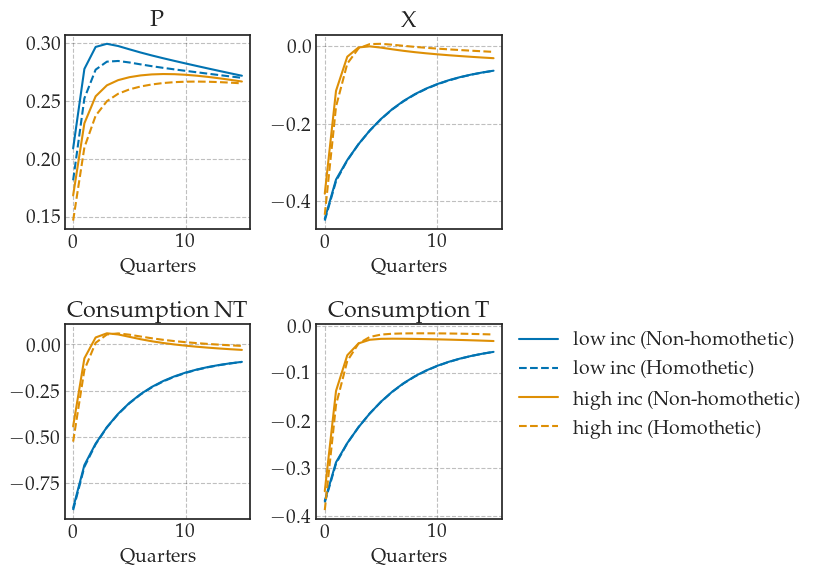

In [5]:

import gc  # For garbage collection
import itertools

def IRF_cohort(model, model_homo, shock, states=None, T_max=16):
    if states is None:
        states = {
            'low': [0, 0, 0],   # original values
            'high': [0, 6, 300]
        }

    # Precompute SS and JAC once for each base model
    model_base = model.copy(name='Baseline')
    model_base.find_ss()
    model_base.compute_jacs()

    model_base_homo = model_homo.copy(name='Baseline Homo')
    model_base_homo.find_ss()
    model_base_homo.compute_jacs()

    # Initialize result dictionaries
    CT_diff, CNT_diff, E_hh_diff, Q_diff, X_diff = {}, {}, {}, {}, {}
    CT_diff_homo, CNT_diff_homo, E_hh_diff_homo, Q_diff_homo, X_diff_homo = {}, {}, {}, {}, {}

    for state in states:
        # === Build normalized Dbeg_choice using both 0 and 1 in the first dimension
        s0, s1, s2 = states[state]
        Dbeg_choice = np.zeros(model.ini.Dbeg.shape)
        for i in [0, 1]:
            Dbeg_choice[i, s1, s2] = 1.0
        Dbeg_choice /= Dbeg_choice.sum()

        # === Standard model
        model_ns = model_base.copy(name='NoShock')
        model_ns.find_transition_path(shocks=[])
        model_ns.simulate_hh_path(Dbeg=Dbeg_choice)
        model_ns.calc_additional_new()

        model_s = model_base.copy(name='Shock')
        model_s.find_transition_path(shocks=shock, do_end_check=False)
        model_s.simulate_hh_path(Dbeg=Dbeg_choice)
        model_s.calc_additional_new()

        CT_diff[state] = (model_s.path.CT_hh - model_ns.path.CT_hh) / model_ns.path.CT_hh * 100
        CNT_diff[state] = (model_s.path.CNT_hh - model_ns.path.CNT_hh) / model_ns.path.CNT_hh * 100
        E_hh_diff[state] = (model_s.path.E_hh - model_ns.path.E_hh) / model_ns.path.E_hh * 100
        Q_diff[state] = (model_s.path.Q_hh - model_ns.path.Q_hh) / model_ns.path.Q_hh * 100
        X_diff[state] = (model_s.path.X_hh - model_ns.path.X_hh) / model_ns.path.X_hh * 100

        del model_ns, model_s
        gc.collect()

        # === Homo model
        model_ns_homo = model_base_homo.copy(name='NoShock Homo')
        model_ns_homo.find_transition_path(shocks=[])
        model_ns_homo.simulate_hh_path(Dbeg=Dbeg_choice)
        model_ns_homo.calc_additional_new()

        model_s_homo = model_base_homo.copy(name='Shock Homo')
        model_s_homo.find_transition_path(shocks=shock, do_end_check=False)
        model_s_homo.simulate_hh_path(Dbeg=Dbeg_choice)
        gc.collect()
        model_s_homo.calc_additional_new()

        CT_diff_homo[state] = (model_s_homo.path.CT_hh - model_ns_homo.path.CT_hh) / model_ns_homo.path.CT_hh * 100
        CNT_diff_homo[state] = (model_s_homo.path.CNT_hh - model_ns_homo.path.CNT_hh) / model_ns_homo.path.CNT_hh * 100
        E_hh_diff_homo[state] = (model_s_homo.path.E_hh - model_ns_homo.path.E_hh) / model_ns_homo.path.E_hh * 100
        Q_diff_homo[state] = (model_s_homo.path.Q_hh - model_ns_homo.path.Q_hh) / model_ns_homo.path.Q_hh * 100
        X_diff_homo[state] = (model_s_homo.path.X_hh - model_ns_homo.path.X_hh) / model_ns_homo.path.X_hh * 100

        del model_ns_homo, model_s_homo

    # === Plotting

    fig = plt.figure(figsize=(10, 6))
    ncols, nrows = 2, 2

    # Assign consistent colors to states using a colormap
    color_cycle = itertools.cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
    state_colors = {state: next(color_cycle) for state in states}

    def plot_panel(ax, title, diff, diff_homo):
        ax.set_title(title)
        for state in states:
            color = state_colors[state]
            ax.plot(diff[state][:T_max], label=f'{state} inc (Non-homothetic)', linestyle='-', color=color)
            ax.plot(diff_homo[state][:T_max], label=f'{state} inc (Homothetic)', linestyle='--', color=color)
        ax.set_xlabel('Quarters')
        ax.set_ylabel('% diff. to s.s.')


    # Plot layout
    ax0 = fig.add_subplot(nrows, ncols, 4)
    plot_panel(ax0, 'Consumption T', CT_diff, CT_diff_homo)
    

    ax1 = fig.add_subplot(nrows, ncols, 3)
    plot_panel(ax1, 'Consumption NT', CNT_diff, CNT_diff_homo)

    ax2 = fig.add_subplot(nrows, ncols, 1)
    plot_panel(ax2, 'P', Q_diff, Q_diff_homo)

    ax3 = fig.add_subplot(nrows, ncols, 2)
    plot_panel(ax3, 'X', X_diff, X_diff_homo)

    # legened outside box 
    ax0.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    plt.tight_layout(rect=[0, 0, 0.85, 1])
    return fig

# Example usage:
fig = IRF_cohort(model, model_tight, shock_PE_s, states={'low': [0, 0, 0], 'high': [0, 6, 300]}, T_max=16)


In [ ]:
model.ss.MPC_e.shape

In [ ]:
ss.omegaiT = ss.ct/(ss.ct+ss.cnt)
ss.etaiT =  1- par.gamma- ss.omegaiT/(1-ss.omegaiT)   *(par.gamma-par.epsilon)# 1- par.gamma - ss.omegaiT/(1-ss.omegaiT)(par.gamma-par.gamma)


In [ ]:
model.ss.omegaiT 
model.ss.etaiT 
model.ss.MPC_e

In [ ]:
model_homo.calc_additional_new()

In [ ]:

model = model_homo 
# model.ss.omegaiT 
# model.ss.etaiT 
# model.ss.MPC_e

ncols = 3
nrows = 1
T_max = 17
type_ = 1


def plot_cor_e(mode,ncols = 3, nrows = 1, T_max = 17, type_ = 1):

    fig = plt.figure(figsize=(4.3*ncols/1.1,3.6*nrows/1.2),dpi=100)
    # fig.suptitle(f'{model.name},  Individal Price indexes', fontsize=20)

    # period 0

    ax = fig.add_subplot(nrows,ncols,1)    
    # For ever second income
    for inc in range(0, 7, 2):
        # For every period
        ax.scatter(  (model.ss.e[type_,inc,:]), model.ss.MPC_e[type_,inc,:], label=f'z = {inc}', s=1)
        
    ax.set_xlabel(r' Expenditure ($e_i$)', fontsize=10) # ****
    ax.set_title('Marginal propensity of Expenditure', fontsize=10) # ****
    ax.set_ylabel(f'MPE', fontsize=12)
    # ax.legend()

    # period 7 

    ax = fig.add_subplot(nrows,ncols,2)

    # For ever second income
    for inc in range(0, 7, 2):
        # For every period
        ax.scatter( (model.ss.e[type_,inc,:]), model.ss.omegaiT[type_,inc,:], label=f'z = {inc}', s=1)
    #     # For every period
    #     ax.scatter(model.ss.MPC_ct[type_,inc,:], (model.path.p[t,type_,inc,:]-1)*100, label=f'z = {inc}', s=1)
    ax.set_title(f'Tradable goods expenditure share', fontsize=10)
    ax.set_ylabel(r'$\omega_{iT}$', fontsize=16) # ****
    ax.set_xlabel(r' Expenditure ($e_i$)', fontsize=10) # ****
    # ax.legend()

    ax = fig.add_subplot(nrows,ncols,3)
    # For ever second income
    for inc in range(0, 7, 2):
        # For every period
        ax.scatter( (model.ss.e[type_,inc,:]), model.ss.etaiT[type_,inc,:], label=f'z = {inc}', s=1)
    ax.set_xlabel(r' Expenditure ($e_i$)', fontsize=10) # ****
    ax.set_title('Elicticity of substitution', fontsize=10) # ****
    ax.set_ylabel(r'$\eta_{iT}$', fontsize=16) # ****

    fig.tight_layout()
    return fig


In [ ]:
fig = figs.show_IRFs([model_base])

In [ ]:
model_homo = IHANKModelClass(name='Homothetic ')
model_homo.par.epsilon = 0.0
model_homo.par.gamma = 0.18
model_homo.find_ss()
model_homo.compute_jacs()
model_homo.find_transition_path(shocks=shock_PE_s, do_end_check=False)


In [ ]:
shock = shock_PE_s
states={'low': [0, 0, 0], 'high': [0, 6, 300]}
T_max=16

# Precompute SS and JAC once for each base model
model_base = model.copy(name='Baseline')
model_base.find_ss()
model_base.compute_jacs()

model_base_homo = model_homo.copy(name='Baseline Homo')
model_base_homo.find_ss()
model_base_homo.compute_jacs()

# Initialize result dictionaries
CT_diff, CNT_diff, E_hh_diff, Q_diff, X_diff = {}, {}, {}, {}, {}
CT_diff_homo, CNT_diff_homo, E_hh_diff_homo, Q_diff_homo, X_diff_homo = {}, {}, {}, {}, {}

for state in states:
    # === Build normalized Dbeg_choice using both 0 and 1 in the first dimension
    s0, s1, s2 = states[state]
    Dbeg_choice = np.zeros(model.ini.Dbeg.shape)
    for i in [0, 1]:
        Dbeg_choice[i, s1, s2] = 1.0
    Dbeg_choice /= Dbeg_choice.sum()

    # === Standard model
    model_ns = model_base.copy(name='NoShock')
    model_ns.find_transition_path(shocks=[])
    model_ns.simulate_hh_path(Dbeg=Dbeg_choice)
    model_ns.calc_additional_new()

    model_s = model_base.copy(name='Shock')
    model_s.find_transition_path(shocks=shock, do_end_check=False)
    model_s.simulate_hh_path(Dbeg=Dbeg_choice)
    model_s.calc_additional_new()

    CT_diff[state] = (model_s.path.CT_hh - model_ns.path.CT_hh) / model_ns.path.CT_hh * 100
    CNT_diff[state] = (model_s.path.CNT_hh - model_ns.path.CNT_hh) / model_ns.path.CNT_hh * 100
    E_hh_diff[state] = (model_s.path.E_hh - model_ns.path.E_hh) / model_ns.path.E_hh * 100
    Q_diff[state] = (model_s.path.Q_hh - model_ns.path.Q_hh) / model_ns.path.Q_hh * 100
    X_diff[state] = (model_s.path.X_hh - model_ns.path.X_hh) / model_ns.path.X_hh * 100

    del model_ns, model_s
    gc.collect()

    # === Homo model
    model_ns_homo = model_base_homo.copy(name='NoShock Homo')
    model_ns_homo.find_transition_path(shocks=[])
    model_ns_homo.simulate_hh_path(Dbeg=Dbeg_choice)
    model_ns_homo.calc_additional_new()

    model_s_homo = model_base_homo.copy(name='Shock Homo')
    model_s_homo.find_transition_path(shocks=shock, do_end_check=False)
    model_s_homo.simulate_hh_path(Dbeg=Dbeg_choice)
    model_s_homo.calc_additional_new()

    CT_diff_homo[state] = (model_s_homo.path.CT_hh - model_ns_homo.path.CT_hh) / model_ns_homo.path.CT_hh * 100
    CNT_diff_homo[state] = (model_s_homo.path.CNT_hh - model_ns_homo.path.CNT_hh) / model_ns_homo.path.CNT_hh * 100
    E_hh_diff_homo[state] = (model_s_homo.path.E_hh - model_ns_homo.path.E_hh) / model_ns_homo.path.E_hh * 100
    Q_diff_homo[state] = (model_s_homo.path.Q_hh - model_ns_homo.path.Q_hh) / model_ns_homo.path.Q_hh * 100
    X_diff_homo[state] = (model_s_homo.path.X_hh - model_ns_homo.path.X_hh) / model_ns_homo.path.X_hh * 100

    del model_ns_homo, model_s_homo
    gc.collect()


In [ ]:

fig = plt.figure(figsize=(10, 6))
ncols, nrows = 2, 2
def plot_panel(ax, title, diff, diff_homo, show_ylabel=False):
    ax.set_title(title)
    for state in states:
        color = state_colors[state]
        ax.plot(diff[state][:T_max], label=f'{state} inc (Non-homothetic)', linestyle='-', color=color)
        ax.plot(diff_homo[state][:T_max], label=f'{state} inc (Homothetic)', linestyle='--', color=color)
    ax.set_xlabel('Quarters')
    if show_ylabel:
        ax.set_ylabel('% diff. to s.s.')

ax0 = fig.add_subplot(nrows, ncols, 4)
plot_panel(ax0, 'Consumption T', CT_diff, CT_diff_homo, show_ylabel=False)

ax1 = fig.add_subplot(nrows, ncols, 3)
plot_panel(ax1, 'Consumption NT', CNT_diff, CNT_diff_homo, show_ylabel=True)

ax2 = fig.add_subplot(nrows, ncols, 1)
plot_panel(ax2, 'P', Q_diff, Q_diff_homo, show_ylabel=True)

ax3 = fig.add_subplot(nrows, ncols, 2)
plot_panel(ax3, 'X', X_diff, X_diff_homo, show_ylabel=False)


In [ ]:
# === Plotting

fig = plt.figure(figsize=(10, 6))
ncols, nrows = 2, 2

# Assign consistent colors to states using a colormap
color_cycle = itertools.cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
state_colors = {state: next(color_cycle) for state in states}

# Panel 1: P
ax2 = fig.add_subplot(nrows, ncols, 1)
ax2.set_title('P')
for state in states:
    color = state_colors[state]
    ax2.plot(Q_diff[state][:T_max], label=f'{state} inc (Non-homothetic)', linestyle='-', color=color)
    ax2.plot(Q_diff_homo[state][:T_max], label=f'{state} inc (Homothetic)', linestyle='--', color=color)
ax2.set_xlabel('Quarters')
ax2.set_ylabel('% diff. to s.s.')

# Panel 2: X
ax3 = fig.add_subplot(nrows, ncols, 2)
ax3.set_title('X')
for state in states:
    color = state_colors[state]
    ax3.plot(X_diff[state][:T_max], label=f'{state} inc (Non-homothetic)', linestyle='-', color=color)
    ax3.plot(X_diff_homo[state][:T_max], label=f'{state} inc (Homothetic)', linestyle='--', color=color)
ax3.set_xlabel('Quarters')
ax3.set_ylabel('% diff. to s.s.')

# Panel 3: Consumption NT
ax1 = fig.add_subplot(nrows, ncols, 3)
ax1.set_title('Consumption NT')
for state in states:
    color = state_colors[state]
    ax1.plot(CNT_diff[state][:T_max], label=f'{state} inc (Non-homothetic)', linestyle='-', color=color)
    ax1.plot(CNT_diff_homo[state][:T_max], label=f'{state} inc (Homothetic)', linestyle='--', color=color)
ax1.set_xlabel('Quarters')
ax1.set_ylabel('% diff. to s.s.')

# Panel 4: Consumption T
ax0 = fig.add_subplot(nrows, ncols, 4)
ax0.set_title('Consumption T')
for state in states:
    color = state_colors[state]
    ax0.plot(CT_diff[state][:T_max], label=f'{state} inc (Non-homothetic)', linestyle='-', color=color)
    ax0.plot(CT_diff_homo[state][:T_max], label=f'{state} inc (Homothetic)', linestyle='--', color=color)
ax0.set_xlabel('Quarters')
ax0.set_ylabel('% diff. to s.s.')

# Legend outside the box
ax0.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout(rect=[0, 0, 0.85, 1])  # leaves room on the right


In [ ]:


# === Plotting

fig = plt.figure(figsize=(10, 6))
ncols, nrows = 2, 2

# Assign consistent colors to states using a colormap
color_cycle = itertools.cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
state_colors = {state: next(color_cycle) for state in states}

def plot_panel(ax, title, diff, diff_homo):
    ax.set_title(title)
    for state in states:
        color = state_colors[state]
        ax.plot(diff[state][:T_max], label=f'{state} inc (Non-homothetic)', linestyle='-', color=color)
        ax.plot(diff_homo[state][:T_max], label=f'{state} inc (Homothetic)', linestyle='--', color=color)
    ax.set_ylabel('% diff. to s.s.')
    ax.set_xlabel('Quarters')


# Plot layout
ax0 = fig.add_subplot(nrows, ncols, 1)
plot_panel(ax0, 'P', Q_diff, Q_diff_homo)

ax1 = fig.add_subplot(nrows, ncols, 2)
plot_panel(ax1, 'X', X_diff, X_diff_homo)


ax2 = fig.add_subplot(nrows, ncols, 3)
plot_panel(ax2, 'Consumption NT', CNT_diff, CNT_diff_homo)


ax3 = fig.add_subplot(nrows, ncols, 4)
plot_panel(ax3, 'Consumption T', CT_diff, CT_diff_homo)

# legened outside box 
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout(rect=[0, 0, 0.85, 1])  # leaves room on the right

plt.tight_layout()

In [ ]:

# === Plotting

fig = plt.figure(figsize=(10, 6))
ncols, nrows = 2, 2

# Assign consistent colors to states using a colormap
color_cycle = itertools.cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
state_colors = {state: next(color_cycle) for state in states}

def plot_panel(ax, title, diff, diff_homo):
    ax.set_title(title)
    for state in states:
        color = state_colors[state]
        ax.plot(diff[state][:T_max], label=f'{state} inc (Non-homothetic)', linestyle='-', color=color)
        ax.plot(diff_homo[state][:T_max], label=f'{state} inc (Homothetic)', linestyle='--', color=color)
    ax.set_xlabel('Quarters')

    ax.set_ylabel('% diff. to s.s.')


# Plot layout
ax0 = fig.add_subplot(nrows, ncols, 4)
plot_panel(ax0, 'Consumption T', CT_diff, CT_diff_homo)
ax0.set_ylabel('% diff. to s.s.')



ax1 = fig.add_subplot(nrows, ncols, 3)
plot_panel(ax1, 'Consumption NT', CNT_diff, CNT_diff_homo)

ax2 = fig.add_subplot(nrows, ncols, 1)
plot_panel(ax2, 'P', Q_diff, Q_diff_homo)

ax3 = fig.add_subplot(nrows, ncols, 2)
plot_panel(ax3, 'X', X_diff, X_diff_homo)

# legened outside box 
ax0.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# plt.tight_layout()

In [ ]:
states = {
            'low': [0, 0, 0],   # original values
            'high': [0, 6, 300]
        }

In [ ]:
fig.

In [ ]:

import gc  # For garbage collection

def IRF_cohort(model, model_homo, shock, states=None, T_max=16):
    if states is None:
        states = {
            'low': [0, 0, 0],   # original values
            'high': [0, 6, 300]
        }

    # Precompute SS and JAC once for each base model
    model_base = model.copy(name='Baseline')
    model_base.find_ss()
    model_base.compute_jacs()

    model_base_homo = model_homo.copy(name='Baseline Homo')
    model_base_homo.find_ss()
    model_base_homo.compute_jacs()

    # Initialize result dictionaries
    CT_diff, CNT_diff, E_hh_diff, Q_diff, X_diff = {}, {}, {}, {}, {}
    CT_diff_homo, CNT_diff_homo, E_hh_diff_homo, Q_diff_homo, X_diff_homo = {}, {}, {}, {}, {}

    for state in states:
        # === Build normalized Dbeg_choice using both 0 and 1 in the first dimension
        s0, s1, s2 = states[state]
        Dbeg_choice = np.zeros(model.ini.Dbeg.shape)
        for i in [0, 1]:
            Dbeg_choice[i, s1, s2] = 1.0
        Dbeg_choice /= Dbeg_choice.sum()

        # === Standard model
        model_ns = model_base.copy(name='NoShock')
        model_ns.find_transition_path(shocks=[])
        model_ns.simulate_hh_path(Dbeg=Dbeg_choice)
        model_ns.calc_additional_new()

        model_s = model_base.copy(name='Shock')
        model_s.find_transition_path(shocks=shock, do_end_check=False)
        model_s.simulate_hh_path(Dbeg=Dbeg_choice)
        model_s.calc_additional_new()

        CT_diff[state] = (model_s.path.CT_hh - model_ns.path.CT_hh) / model_ns.path.CT_hh * 100
        CNT_diff[state] = (model_s.path.CNT_hh - model_ns.path.CNT_hh) / model_ns.path.CNT_hh * 100
        E_hh_diff[state] = (model_s.path.E_hh - model_ns.path.E_hh) / model_ns.path.E_hh * 100
        Q_diff[state] = (model_s.path.Q_hh - model_ns.path.Q_hh) / model_ns.path.Q_hh * 100
        X_diff[state] = (model_s.path.X_hh - model_ns.path.X_hh) / model_ns.path.X_hh * 100

        del model_ns, model_s
        gc.collect()

        # === Homo model
        model_ns_homo = model_base_homo.copy(name='NoShock Homo')
        model_ns_homo.find_transition_path(shocks=[])
        model_ns_homo.simulate_hh_path(Dbeg=Dbeg_choice)
        model_ns_homo.calc_additional_new()

        model_s_homo = model_base_homo.copy(name='Shock Homo')
        model_s_homo.find_transition_path(shocks=shock, do_end_check=False)
        model_s_homo.simulate_hh_path(Dbeg=Dbeg_choice)
        model_s_homo.calc_additional_new()

        CT_diff_homo[state] = (model_s_homo.path.CT_hh - model_ns_homo.path.CT_hh) / model_ns_homo.path.CT_hh * 100
        CNT_diff_homo[state] = (model_s_homo.path.CNT_hh - model_ns_homo.path.CNT_hh) / model_ns_homo.path.CNT_hh * 100
        E_hh_diff_homo[state] = (model_s_homo.path.E_hh - model_ns_homo.path.E_hh) / model_ns_homo.path.E_hh * 100
        Q_diff_homo[state] = (model_s_homo.path.Q_hh - model_ns_homo.path.Q_hh) / model_ns_homo.path.Q_hh * 100
        X_diff_homo[state] = (model_s_homo.path.X_hh - model_ns_homo.path.X_hh) / model_ns_homo.path.X_hh * 100

        del model_ns_homo, model_s_homo
        gc.collect()

    # === Plotting
    fig = plt.figure(figsize=(10, 6))
    ncols, nrows = 2, 2

    def plot_panel(ax, title, diff, diff_homo):
        ax.set_title(title)
        for state in states:
            ax.plot(diff[state][:T_max], label=f'{state} inc (Non-homothetic)')
            ax.plot(diff_homo[state][:T_max], linestyle='--', label=f'{state} inc (Homothetic)')
        ax.set_xlabel('Quarters')
        ax.set_ylabel('% diff. to s.s.')
        ax.legend()

    ax0 = fig.add_subplot(nrows, ncols, 4)
    plot_panel(ax0, 'Consumption T', CT_diff, CT_diff_homo)

    ax1 = fig.add_subplot(nrows, ncols, 3)
    plot_panel(ax1, 'Consumption NT', CNT_diff, CNT_diff_homo)

    ax2 = fig.add_subplot(nrows, ncols, 1)
    plot_panel(ax2, 'P', Q_diff, Q_diff_homo)

    ax3 = fig.add_subplot(nrows, ncols, 2)
    plot_panel(ax3, 'X', X_diff, X_diff_homo)

    fig.tight_layout()
    return fig

# Example usage:
fig = IRF_cohort(model_base, model_homo, shock_PE_s, states={'low': [0, 0, 0], 'high': [0, 6, 300]}, T_max=16)


In [ ]:

import gc  # Garbage collection

def IRF_cohort(model, model_homo, shock, states=None, T_max=16):
    if states is None:
        states = {'low': [0, 0, 0], 'high': [0, 6, 300]}

    # Precompute SS and JAC once for each base model
    model_base = model.copy(name='Baseline')
    model_base.find_ss()
    model_base.compute_jacs()

    model_base_homo = model_homo.copy(name='Baseline Homo')
    model_base_homo.find_ss()
    model_base_homo.compute_jacs()

    # Initialize result dictionaries
    CT_diff, CNT_diff, E_hh_diff, Q_diff, X_diff = {}, {}, {}, {}, {}
    CT_diff_homo, CNT_diff_homo, E_hh_diff_homo, Q_diff_homo, X_diff_homo = {}, {}, {}, {}, {}

    for state in states:
        Dbeg_choice = np.zeros(model.ini.Dbeg.shape)
        Dbeg_choice[tuple(states[state])] = 1.0

        # Standard model with no shock
        model_ns = model_base.copy(name='NoShock')
        model_ns.find_transition_path(shocks=[])
        model_ns.simulate_hh_path(Dbeg=Dbeg_choice)
        model_ns.calc_additional_new()

        # Standard model with shock
        model_s = model_base.copy(name='Shock')
        model_s.find_transition_path(shocks=shock, do_end_check=False)
        model_s.simulate_hh_path(Dbeg=Dbeg_choice)
        model_s.calc_additional_new()

        CT_diff[state] = (model_s.path.CT_hh - model_ns.path.CT_hh) / model_ns.path.CT_hh * 100
        CNT_diff[state] = (model_s.path.CNT_hh - model_ns.path.CNT_hh) / model_ns.path.CNT_hh * 100
        E_hh_diff[state] = (model_s.path.E_hh - model_ns.path.E_hh) / model_ns.path.E_hh * 100
        Q_diff[state] = (model_s.path.Q_hh - model_ns.path.Q_hh) / model_ns.path.Q_hh * 100
        X_diff[state] = (model_s.path.X_hh - model_ns.path.X_hh) / model_ns.path.X_hh * 100

        del model_ns, model_s
        gc.collect()

        # Homo model with no shock
        model_ns_homo = model_base_homo.copy(name='NoShock Homo')
        model_ns_homo.find_transition_path(shocks=[])
        model_ns_homo.simulate_hh_path(Dbeg=Dbeg_choice)
        model_ns_homo.calc_additional_new()

        # Homo model with shock
        model_s_homo = model_base_homo.copy(name='Shock Homo')
        model_s_homo.find_transition_path(shocks=shock, do_end_check=False)
        model_s_homo.simulate_hh_path(Dbeg=Dbeg_choice)
        model_s_homo.calc_additional_new()

        CT_diff_homo[state] = (model_s_homo.path.CT_hh - model_ns_homo.path.CT_hh) / model_ns_homo.path.CT_hh * 100
        CNT_diff_homo[state] = (model_s_homo.path.CNT_hh - model_ns_homo.path.CNT_hh) / model_ns_homo.path.CNT_hh * 100
        E_hh_diff_homo[state] = (model_s_homo.path.E_hh - model_ns_homo.path.E_hh) / model_ns_homo.path.E_hh * 100
        Q_diff_homo[state] = (model_s_homo.path.Q_hh - model_ns_homo.path.Q_hh) / model_ns_homo.path.Q_hh * 100
        X_diff_homo[state] = (model_s_homo.path.X_hh - model_ns_homo.path.X_hh) / model_ns_homo.path.X_hh * 100

        del model_ns_homo, model_s_homo
        gc.collect()

    # Plotting
    fig = plt.figure(figsize=(10, 6))
    ncols, nrows = 2, 2

    def plot_panel(ax, title, diff, diff_homo):
        ax.set_title(title)
        for state in states:
            ax.plot(diff[state][:T_max], label=f'{state} (std)')
            ax.plot(diff_homo[state][:T_max], linestyle='--', label=f'{state} (homo)')
        ax.set_xlabel('Quarters')
        ax.set_ylabel('% diff. to s.s.')
        ax.legend()

    ax0 = fig.add_subplot(nrows, ncols, 1)
    plot_panel(ax0, 'Consumption T', CT_diff, CT_diff_homo)

    ax1 = fig.add_subplot(nrows, ncols, 2)
    plot_panel(ax1, 'Consumption NT', CNT_diff, CNT_diff_homo)

    ax2 = fig.add_subplot(nrows, ncols, 3)
    plot_panel(ax2, 'P', Q_diff, Q_diff_homo)

    ax3 = fig.add_subplot(nrows, ncols, 4)
    plot_panel(ax3, 'X', X_diff, X_diff_homo)

    fig.tight_layout()
    return fig


In [ ]:
fig = IRF_cohort(model_base, model_homo, shock_PE_s, states={'low': [0, 0, 0], 'high': [0, 6, 300]}, T_max=16)


In [ ]:
def IRF_cohort(model, model_homo, shock, states=None, T_max=16):
    if states is None:
        states = {'low': [0, 0, 0], 'high': [0, 6, 300]}

    # === Standard model
    model_no_shock = model.copy(name='Baseline')
    model_no_shock.find_ss()
    model_no_shock.compute_jacs()
    model_no_shock.find_transition_path(shocks=[])

    model_shock = model.copy(name='Shock')
    model_shock.find_ss()
    model_shock.compute_jacs()
    model_shock.find_transition_path(shocks=shock, do_end_check=False)

    # === Homo model
    model_no_shock_homo = model_homo.copy(name='Baseline Homo')
    model_no_shock_homo.find_ss()
    model_no_shock_homo.compute_jacs()
    model_no_shock_homo.find_transition_path(shocks=[])

    model_shock_homo = model_homo.copy(name='Shock Homo')
    model_shock_homo.find_ss()
    model_shock_homo.compute_jacs()
    model_shock_homo.find_transition_path(shocks=shock, do_end_check=False)

    # === Dictionaries to hold results
    CT_diff = {}
    CNT_diff = {}
    E_hh_diff = {}
    Q_diff = {}
    X_diff = {}

    CT_diff_homo = {}
    CNT_diff_homo = {}
    E_hh_diff_homo = {}
    Q_diff_homo = {}
    X_diff_homo = {}

    for state in states:
        Dbeg_choice = np.zeros(model.ini.Dbeg.shape)
        Dbeg_choice[tuple(states[state])] = 1.0

        # Standard model
        model_no_shock.simulate_hh_path(Dbeg=Dbeg_choice)
        model_no_shock.calc_additional_new()
        model_shock.simulate_hh_path(Dbeg=Dbeg_choice)
        model_shock.calc_additional_new()

        CT_diff[state] = (model_shock.path.CT_hh - model_no_shock.path.CT_hh) / model_no_shock.path.CT_hh * 100
        CNT_diff[state] = (model_shock.path.CNT_hh - model_no_shock.path.CNT_hh) / model_no_shock.path.CNT_hh * 100
        E_hh_diff[state] = (model_shock.path.E_hh - model_no_shock.path.E_hh) / model_no_shock.path.E_hh * 100
        Q_diff[state] = (model_shock.path.Q_hh - model_no_shock.path.Q_hh) / model_no_shock.path.Q_hh * 100
        X_diff[state] = (model_shock.path.X_hh - model_no_shock.path.X_hh) / model_no_shock.path.X_hh * 100

        # Homo model
        model_no_shock_homo.simulate_hh_path(Dbeg=Dbeg_choice)
        model_no_shock_homo.calc_additional_new()
        model_shock_homo.simulate_hh_path(Dbeg=Dbeg_choice)
        model_shock_homo.calc_additional_new()

        CT_diff_homo[state] = (model_shock_homo.path.CT_hh - model_no_shock_homo.path.CT_hh) / model_no_shock_homo.path.CT_hh * 100
        CNT_diff_homo[state] = (model_shock_homo.path.CNT_hh - model_no_shock_homo.path.CNT_hh) / model_no_shock_homo.path.CNT_hh * 100
        E_hh_diff_homo[state] = (model_shock_homo.path.E_hh - model_no_shock_homo.path.E_hh) / model_no_shock_homo.path.E_hh * 100
        Q_diff_homo[state] = (model_shock_homo.path.Q_hh - model_no_shock_homo.path.Q_hh) / model_no_shock_homo.path.Q_hh * 100
        X_diff_homo[state] = (model_shock_homo.path.X_hh - model_no_shock_homo.path.X_hh) / model_no_shock_homo.path.X_hh * 100

    # === Plotting
    fig = plt.figure(figsize=(10, 6))
    ncols = 2
    nrows = 2

    def plot_panel(ax, title, diff, diff_homo):
        ax.set_title(title)
        for state in states:
            ax.plot(diff[state][:T_max], label=f'{state} (std)')
            ax.plot(diff_homo[state][:T_max], linestyle='--', label=f'{state} (homo)')
        ax.set_xlabel('Quarters')
        ax.set_ylabel('% diff. to s.s.')
        ax.legend()

    ax0 = fig.add_subplot(ncols, nrows, 1)
    plot_panel(ax0, 'Consumption T', CT_diff, CT_diff_homo)

    ax1 = fig.add_subplot(ncols, nrows, 2)
    plot_panel(ax1, 'Consumption NT', CNT_diff, CNT_diff_homo)

    ax2 = fig.add_subplot(ncols, nrows, 3)
    plot_panel(ax2, 'P', Q_diff, Q_diff_homo)

    ax3 = fig.add_subplot(ncols, nrows, 4)
    plot_panel(ax3, 'X', X_diff, X_diff_homo)

    fig.tight_layout()
    return fig

fig = IRF_cohort(model_base, model_homo, shock_PE_s, states={'low': [0, 0, 0], 'high': [0, 6, 300]}, T_max=16)


In [ ]:
model_e1 = IHANKModelClass(name='epsion = 0.10')
model_e1.par.epsilon = 0.10
model_e1.par.gamma = 0.24
model_e1.find_ss()
model_e1.compute_jacs()
model_e1.find_transition_path(shocks=shock_PE_s, do_end_check=False)


In [ ]:
model_e05 = IHANKModelClass(name='epsion = 0.05')
model_e05.par.epsilon = 0.05
model_e05.par.gamma = 0.21
model_e05.find_ss()
model_e05.compute_jacs()
model_e05.find_transition_path(shocks=shock_PE_s, do_end_check=False)


In [ ]:
model_e0 = IHANKModelClass(name='epsion = 0.00')
model_e0.par.epsilon = 0.00
model_e0.par.gamma = 0.18
model_e0.find_ss()
model_e0.compute_jacs()
model_e0.find_transition_path(shocks=shock_PE_s, do_end_check=False)

In [ ]:
models = [model_base, model_e1, model_e15, model_e05, model_e0]

In [ ]:

for model_i in models:
    model_i.calc_additional_new()
# table with model.name, model.par.gamma, model.par.epsilon, model.par.eta_T_RA, model.cov_e_omegaT, model.cor_e_omegaT
table_data = []
for model_i in models:
    table_data.append({
        'Model': model_i.name,
        'gamma': model_i.par.gamma,
        'epsilon': model_i.par.epsilon,
        'eta_T_RA': model_i.par.eta_T_RA,
        'cov_e_omegaT': model_i.cov_e_omegaT,
        'cor_e_omegaT': model_i.cor_e_omegaT
    })
table_df = pd.DataFrame(table_data)

table_df = table_df[['Model', 'gamma', 'epsilon', 'eta_T_RA', 'cov_e_omegaT', 'cor_e_omegaT']]
# round cov 
table_df['cov_e_omegaT'] = table_df['cov_e_omegaT'].round(4)

table_df

In [ ]:
model_CD = IHANKModelClass(name='CD')
model_CD.par.epsilon = 0.0
model_CD.par.gamma = 0.0
model_CD.find_ss()
model_CD.compute_jacs()
model_CD.find_transition_path(shocks=shock_PE_s, do_end_check=False)
model_CD.calc_additional_new()

In [ ]:
models = [model_base, model_e1,  model_e05, model_e0]

In [ ]:
for model_i in models:
    model_i.calc_additional_new()
    model_i.name = f'cov = {model_i.cov_e_omegaT:.3f}'


In [ ]:
fig = figs.show_IRFs(models, paths=['P', 'X', 'CT', 'CNT' ], colors = colors, maxcol=2)
fig.savefig('plots/IRF_epsion.png', dpi=300, bbox_inches='tight')

In [ ]:
# Colors ranging from dark blue to light blue with 5 colors
colors = sns.color_palette("Blues", n_colors=5)
colors = sns.color_palette("Reds", n_colors=5)
colors = sns.color_palette("Reds", n_colors=5)



In [ ]:

def IRF_cohort(model, model_homo shock, states= None, T_max=16):

    if states is None:
        states = {}
        states['low'] = [0,0,0]
        # states['mid'] = [0,4,10]
        states['high'] = [0,6,300]

    #  Model with paths for inputs
    model_no_shock = model.copy(name=f'Baseline')
    model_no_shock.find_ss()
    model_no_shock.compute_jacs()
    model_no_shock.find_transition_path(shocks=[])

    model_shock = model.copy(name=f'Baseline')
    model_shock.find_ss()
    model_shock.compute_jacs()
    model_shock.find_transition_path(shocks=shock, do_end_check=False)




    #  Model with paths for inputs
    model_no_shock_homo = model_homo.copy(name=f'Baseline')
    model_no_shock_homo.find_ss()
    model_no_shock_homo.compute_jacs()
    model_no_shock_homo.find_transition_path(shocks=[])

    model_shock_homo = model_homo.copy(name=f'Baseline')
    model_shock_homo.find_ss()
    model_shock_homo.compute_jacs()
    model_shock_homo.find_transition_path(shocks=shock, do_end_check=False)


    CT_diff = {}
    CNT_diff = {}
    E_hh_diff = {}
    Q_diff = {}
    X_diff = {}


    #------- for each state, simulate the path

    for state in states.keys(): 

        # empty states
        Dbeg_choice = np.zeros(model.ini.Dbeg.shape)
        # choose state
        Dbeg_choice[tuple(states[state])] = 1.0


        # simulate HH path for states before shock
        model_no_shock.simulate_hh_path(Dbeg = Dbeg_choice)
        model_no_shock.calc_additional_new()


        # simulate HH path for states after shock
        model_shock.simulate_hh_path(Dbeg = Dbeg_choice)
        model_shock.calc_additional_new()


        # Save the difference in paths for CT and CNT
        CT_diff[state] = (model_shock.path.CT_hh - model_no_shock.path.CT_hh) / model_no_shock.path.CT_hh * 100
        CNT_diff[state] = (model_shock.path.CNT_hh - model_no_shock.path.CNT_hh) / model_no_shock.path.CNT_hh * 100
        E_hh_diff[state] = (model_shock.path.E_hh - model_no_shock.path.E_hh) / model_no_shock.path.E_hh * 100
        Q_diff[state] = (model_shock.path.Q_hh - model_no_shock.path.Q_hh) / model_no_shock.path.Q_hh * 100
        X_diff[state] = (model_shock.path.X_hh - model_no_shock.path.X_hh) / model_no_shock.path.X_hh * 100



    fig = plt.figure(figsize=(10, 6))
    ncols = 2
    nrows = 2



    ax0 = fig.add_subplot(ncols, nrows, 1)
    ax0.set_title('Consumption T')
    for state in states.keys(): 
        ax0.plot(CT_diff[state][:T_max], label=state)
    ax0.legend()
    ax0.set_xlabel('Quarters')
    ax0.set_ylabel('\% diff. to s.s.')

    ax1 = fig.add_subplot(ncols, nrows, 2)
    ax1.set_title('Consumption NT')
    for state in states.keys(): 
        ax1.plot(CNT_diff[state][:T_max], label=state)
    ax1.legend()
    ax1.set_xlabel('Quarters')
    ax1.set_ylabel('\% diff. to s.s.')

    ax2 = fig.add_subplot(ncols, nrows, 3)
    ax2.set_title('P')
    for state in states.keys(): 
        ax2.plot(Q_diff[state][:T_max], label=state)
    ax2.legend()
    ax2.set_xlabel('Quarters')
    ax2.set_ylabel('\% diff. to s.s.')

    ax3 = fig.add_subplot(ncols, nrows, 4)
    ax3.set_title('X')
    for state in states.keys(): 
        ax3.plot(X_diff[state][:T_max], label=state)
    ax3.legend()
    ax3.set_xlabel('Quarters')
    ax3.set_ylabel('\% diff. to s.s.')
    fig.tight_layout()





    return fig

fig = IRF_cohort(model_base, model_base, shock_PE_s, states={'low': [0,0,0], 'high': [0,6,300]}, T_max=16)

In [ ]:

def show_IRFs(models,paths=None,
            #   labels=None,
              T_max=20,scale=False,
              lwidth=1.3,lstyles=None,colors=None,
              maxcol=3,figsize=None,
              lfsize=12,legend_window=0,
              compare_LP=None,CI=False,do_stds=False,show=True):

    # a. models as list
    if type(models) is dict: models = [model for model in models.values()]
    model = models[0]
    par = model.par



    # b. inputs
    if paths is None: paths = paths_defaults['standard_vs_data']
    if type(paths) is str: paths = paths_defaults[paths]
    # if labels is None: labels = [None]*len(models)
    # assert len(labels) >= len(models), f'{len(labels) = } must be same as {len(models) = }'
    if lstyles is None: lstyles = ['-','--','-.',':',(0,(3, 1, 1, 1)),(0,(3, 5, 1, 5, 1, 5))]    
    if T_max is None: T_max = par.T   
    T_max_LP = 17
    labels = []
    for i in models:
        labels.append(i.name)

    # c. figure
    num = len(paths)
    nrows = num//maxcol+1
    ncols = np.fmin(num,maxcol)
    if num%maxcol == 0: nrows -= 1 

#***** FiGURE SIZE
    if figsize is None:
        #fig = plt.figure(figsize=(4.3*ncols,3.6*nrows))
        x_size, y_size = 13.5/maxcol*ncols, 10/maxcol*nrows
        fig = plt.figure(figsize=(x_size, y_size), dpi=100)
    else:
        fig = plt.figure(figsize=(figsize[0]*ncols,figsize[1]*nrows))

    for i,pathname in enumerate(paths):

        ax = fig.add_subplot(nrows,ncols,i+1)

        # axis
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        if T_max < 100:
            ax.set_xticks(np.arange(0,T_max,4))
        
        # models
        for j, model_ in enumerate(models):  
            
            if lstyles is None:
                lstyle = '-' 
            else:
                lstyle = lstyles[j]

            if not colors is None:
                color = colors[j]
            else:
                color = f'C{j}'

            label = labels[j]

            if j == 0: ax.plot(np.arange(T_max),np.zeros(T_max),'-', color='black')
            _plot_IRFs(ax,model_,pathname,scale,lstyle,color,lwidth,label,T_max)

            ax.set_xlim([0,T_max-1])
            if i >= ncols*(nrows-1): ax.set_xlabel('Quarters')
            
        if compare_LP is not None:

            try:

                ax.plot(np.arange(T_max_LP),compare_LP['IRF'][pathname][:T_max_LP]*100,label='LP',
                        linestyle='--',color='black',lw=lwidth)
                
                if do_stds:

                    if CI:

                        prob=0.05
                        sign = norm.ppf(1-prob/2)
                        SE = compare_LP['SE'][pathname]
                        LO = compare_LP['IRF'][pathname] - SE
                        HI = compare_LP['IRF'][pathname] + SE
                        ax.fill_between(np.arange(T_max_LP), LO[:T_max_LP], HI[:T_max_LP], alpha=0.15, color='C0')
                        LO = compare_LP['IRF'][pathname] - sign*SE
                        HI = compare_LP['IRF'][pathname] + sign*SE
                        ax.fill_between(np.arange(T_max_LP), LO[:T_max_LP], HI[:T_max_LP], alpha=0.08, color='C0')
                
                else:

                    if CI:

                        LO = compare_LP['IRF'][pathname] + compare_LP['LO'][pathname][:,0]*100  
                        HI = compare_LP['IRF'][pathname] + compare_LP['HI'][pathname][:,0]*100  
                        ax.fill_between(np.arange(T_max_LP), LO[:T_max_LP], HI[:T_max_LP], alpha=0.25, color='C0')
                        LO = compare_LP['IRF'][pathname] + compare_LP['LO'][pathname][:,1]*100  
                        HI = compare_LP['IRF'][pathname] + compare_LP['HI'][pathname][:,1]*100  
                        ax.fill_between(np.arange(T_max_LP), LO[:T_max_LP], HI[:T_max_LP], alpha=0.15, color='C0')
            
            except:
                
                pass

        if len(models) > 1:
            if i == legend_window: ax.legend(frameon=True)

    #fig.tight_layout(pad=1.0)
    fig.subplots_adjust(hspace=0.4)
    fig.subplots_adjust(wspace=0.4)
    if show : plt.show()

    return fig



In [ ]:
model_CD = IHANKModelClass(name='CD')
model_CD.par.epsilon = 0.0
model_CD.par.gamma = 0.0
model_CD.find_ss()
model_CD.compute_jacs()
model_CD.find_transition_path(shocks=shock_PE_s, do_end_check=False)

In [ ]:
model_compare = IHANKModelClass(name='Epsilon 0 gamma 0.18')
model_compare.par.epsilon = 0.0
model_compare.par.gamma = 0.18
model_compare.find_ss()
model_compare.compute_jacs()
model_compare.find_transition_path(shocks=shock_PE_s, do_end_check=False)


In [ ]:
model.par.gamma

In [ ]:
model.par.gamma

In [ ]:
epsilon = [0.18, 0.15, 0.1, 0.05, 0.01]
gamma = [0.18, 0.2, 0.22, 0.25, 0.28, 0.29]
eta = np.zeros((len(epsilon), len(gamma)))

for i in range(len(epsilon)):
    for j in range(len(gamma)):
        model_e = IHANKModelClass(name='epsilon 0.1')
        model_e.par.epsilon = epsilon[i]
        model_e.par.gamma = gamma[j]
        model_e.find_ss()
        eta[i, j] = model_e.par.eta_T_RA

# Plotting
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

for i in range(len(epsilon)):
    ax.plot(gamma, eta[i, :], label=f'epsilon={epsilon[i]}')

ax.set_xlabel('gamma')
ax.set_ylabel('eta_T_RA')
ax.set_title('eta_T_RA as function of gamma for different epsilon values')
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Plotting
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

for i in range(len(epsilon)):
    ax.plot(gamma, eta[i, :], label=f'epsilon={epsilon[i]}')

# h line at eta = 0.4
ax.axhline(y=0.4, color='r', linestyle='--', label='eta = 0.4')
ax.set_xlabel('gamma')
ax.set_ylabel('eta_T_RA')
ax.set_title('eta_T_RA as function of gamma for different epsilon values')
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:

x = 0.1
epsilon = 0.1

epsilon = [0.18, 0.15, 0.1, 0.05, 0.01]
gamma = [0.18, 0.2, 0.22, 0.25, 0.28, 0.29]
eta = []

for i in range(len(epsilon)):
    for j in range(len(gamma)):
        model_e = IHANKModelClass(name='epsilon 0.1')
        model_e.par.epsilon = epsilon[i]
        model_e.par.gamma = gamma[j]
        model_e.find_ss()
        eta.append(model_e.par.eta_T_RA)

# plot x axis = eta, y axis gamma, for each epsilon
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)


In [ ]:
models = [model, model_CD, model_compare]
for model_i in models:
    model_i.calc_additional_new()
# table with model.name, model.par.gamma, model.par.epsilon, model.par.eta_T_RA, model.cov_e_omegaT, model.cor_e_omegaT
table_data = []
for model in models:
    table_data.append({
        'Model': model.name,
        'gamma': model.par.gamma,
        'epsilon': model.par.epsilon,
        'eta_T_RA': model.par.eta_T_RA,
        'cov_e_omegaT': model.cov_e_omegaT,
        'cor_e_omegaT': model.cor_e_omegaT
    })
table_df = pd.DataFrame(table_data)
table_df = table_df[['Model', 'gamma', 'epsilon', 'eta_T_RA', 'cov_e_omegaT', 'cor_e_omegaT']]
# round cov 
table_df['cov_e_omegaT'] = table_df['cov_e_omegaT'].round(4)

table_df

In [ ]:
# table with model.name, model.par.gamma, model.par.epsilon, model.par.eta_T_RA, model.cov_e_omegaT, model.cor_e_omegaT
table_data = []
for model in models:
    table_data.append({
        'Model': model.name,
        'gamma': model.par.gamma,
        'epsilon': model.par.epsilon,
        'eta_T_RA': model.par.eta_T_RA,
        'cov_e_omegaT': model.cov_e_omegaT,
        'cor_e_omegaT': model.cor_e_omegaT
    })
table_df = pd.DataFrame(table_data)
table_df = table_df[['Model', 'gamma', 'epsilon', 'eta_T_RA', 'cov_e_omegaT', 'cor_e_omegaT']]
# round cov 
table_df['cov_e_omegaT'] = table_df['cov_e_omegaT'].round(4)

table_df

In [ ]:
model

In [ ]:
model_epsilon0 = IHANKModelClass(name='Epsilon 0')
model_epsilon0.par.epsilon = 0.0
try:
    model_epsilon0.find_ss()
    model_epsilon0.compute_jacs()
    model_epsilon0.find_transition_path(shocks=shock_PE_s, do_end_check=False)
except:
    print(f'Model not solved for epsilon = {model_epsilon0.par.epsilon}')
    

In [ ]:
models = [model, model_compare, model_CD, model_gamma0, model_epsilon0]

In [ ]:
model.par.epsilon 

In [ ]:
model_compare.calc_MPCs()

In [ ]:
         # base periode expenditure share on nontradables

model_compare.ss.ct_exp_share = model_compare.ss.ct/(model_compare.ss.cnt + model_compare.ss.ct) # prices are normalized to 1 so no need to multiply 


In [ ]:

A = model_CD.ss.MPC_e.ravel()
B = model_CD.ss.ct_exp_share.ravel()
w = model_CD.ss.D.ravel()

# Normalize weights to sum to 1
w /= np.sum(w)

# Compute weighted means
mean_A = np.sum(w * A)
mean_B = np.sum(w * B)

std_B = np.sqrt(np.sum(w * (B - mean_B) ** 2))
std_B
cov_AB = np.sum(w * (A - mean_A) * (B - mean_B))
cov_AB

In [ ]:
model.calc_additional_new()

In [ ]:
model.cor_e_omega

In [ ]:
try: 
    model.cov_e_omega
    print('Covariance already calculated')
except:
    model.calc_cov_e_omegaT()
    model.cov_e_omega
    print('Covariance calculated')

In [ ]:
# Flatten all arrays
def Cov_e_omegaT(model):
    A = model.ss.e.ravel()
    B = model.ss.ct_exp_share.ravel()
    w = model.ss.D.ravel()

    # Normalize weights to sum to 1
    w /= np.sum(w)

    # Compute weighted means
    mean_A = np.sum(w * A)
    mean_B = np.sum(w * B)

    # Compute weighted covariance
    cov_AB = np.sum(w * (A - mean_A) * (B - mean_B))

    std_A = np.sqrt(np.sum(w * (A - mean_A) ** 2))
    std_B = np.sqrt(np.sum(w * (B - mean_B) ** 2))

    eps = 1e-10  # numerical tolerance

    if std_A < eps or std_B < eps:
        corr_AB = 0.0
    else:
        corr_AB = cov_AB / (std_A * std_B)

    self.cov_e_omega = cov_AB
    self.cor_e_omega = corr_AB




    print(f'model {model.name} has cov(e,omga) = {corr_AB:.2f} and eta = {model.par.eta_T_RA:.2f}')


Cov_MPC(model)
Cov_MPC(model_CD)
Cov_MPC(model_compare)


In [ ]:
# plt.scatter(model.ss.ct_exp_share, model.ss.MPC_e)

# compute covariance between the two
cov = np.cov(model.ss.ct_exp_share, model.ss.MPC_e)
print(f'Covariance between ct_exp_share and MPC_e: {cov[0, 1]}')

In [ ]:
for model in models: 
    print(f'{model.name} eta = {model.par.eta_T_RA:.2f}')

In [ ]:
figs.show_IRFs(models)